# ML Classifier Copies Integration

In [54]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, accuracy_score
from sklearn.datasets import make_blobs, make_moons

from presc.dataset import Dataset
from presc.copies.sampling import dynamical_range, grid_sampling, uniform_sampling, normal_sampling, labeling
from presc.copies.evaluations import empirical_fidelity_error
from presc.copies.copying import ClassifierCopy

In [55]:
def plot_comparison_synthetic_datasets(synthetic_1, synthetic_2):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, sharey=True)

    axs[0].scatter(synthetic_1.df["x0"], synthetic_1.df["x1"], c=synthetic_1.labels)
    axs[0].set_aspect("equal")
    axs[0].set(xlabel="x0", ylabel="x1", title="Blobs classifier")

    axs[1].scatter(synthetic_2.df["x0"], synthetic_2.df["x1"], c=synthetic_2.labels)
    axs[1].set_aspect("equal")
    axs[1].set(xlabel="x0", ylabel="x1", title="Moons classifier")
    axs[1].yaxis.set_tick_params(labelbottom=True)

    plt.show()

## Original datasets
### Blobs

In [56]:
df_blobs = pd.DataFrame(np.column_stack((make_blobs(n_samples=200, centers=[(0,0), (2,1)], n_features=2, 
                                                    random_state=0))), columns=["x0", "x1", "y"])
dataset_blobs = Dataset(df_blobs, label_col="y")

(-2.5, 3.5)

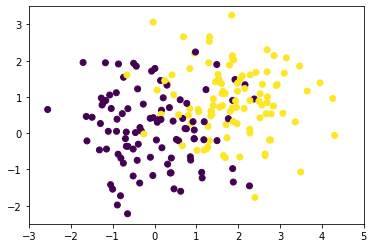

In [57]:
plt.scatter(dataset_blobs.df["x0"],dataset_blobs.df["x1"], c=dataset_blobs.labels)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

### Moons

In [58]:
df_moons = pd.DataFrame(np.column_stack((make_moons(n_samples=200, noise=0.2, random_state=0))), 
                        columns=["x0", "x1", "y"])
dataset_moons = Dataset(df_moons, label_col="y")

(-2.5, 3.5)

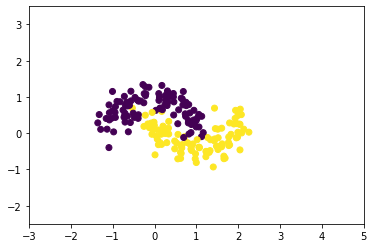

In [59]:
plt.scatter(dataset_moons.df["x0"],dataset_moons.df["x1"], c=dataset_moons.labels)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

## Fit classifiers
### Blobs


Score of trained SVC classifier: 0.8

Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



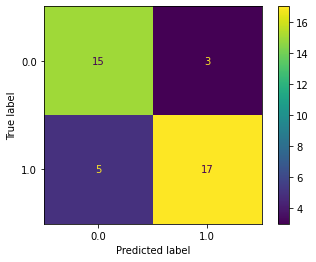

In [60]:
# Train/test split
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(dataset_blobs.features, 
                                                                            dataset_blobs.labels, test_size=0.20, 
                                                                            random_state=0)

# SVC classifier
classifier_blobs = SVC(kernel='linear', decision_function_shape='ovo')
classifier_blobs.fit(X_train_blobs, y_train_blobs)
y_predicted_blobs = classifier_blobs.predict(X_test_blobs)

score = classifier_blobs.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_blobs, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted_blobs))

### Moons


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



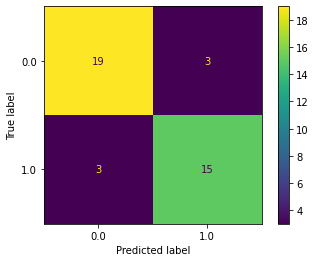

In [61]:
# Train/test split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(dataset_moons.features, 
                                                                            dataset_moons.labels, 
                                                                            test_size=0.20, random_state=0)

# SVC classifier
classifier_moons = SVC(kernel='linear', decision_function_shape='ovo')
classifier_moons.fit(X_train_moons, y_train_moons)
y_predicted_moons = classifier_moons.predict(X_test_moons)

score = classifier_moons.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_moons, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted_moons))

## Feature dynamical ranges

In [62]:
print("Blobs dataset:")
blobs_range = dynamical_range(dataset_blobs.features)

Blobs dataset:
x0 min: -2.5530    x0 max: 4.3039    Interval: 6.8569   
x1 min: -2.2234    x1 max: 3.2567    Interval: 5.4801   


In [63]:
print("Moons dataset:")
moons_range = dynamical_range(dataset_moons.features)

Moons dataset:
x0 min: -1.3546    x0 max: 2.2554    Interval: 3.6100   
x1 min: -0.9321    x1 max: 1.3416    Interval: 2.2737   


## Generate distribution
###  Grid-like uniform 

We predict the labels of the generated data using the original classifiers.

In [64]:
# Blobs dataset
X_generated_gb = grid_sampling(nsamples=100, feature_parameters=blobs_range)
X_generated_gb = labeling(X_generated_gb, classifier_blobs, label_col="y")

# Moons dataset
X_generated_gm = grid_sampling(nsamples=100, feature_parameters=moons_range)
X_generated_gm = labeling(X_generated_gm, classifier_moons, label_col="y")

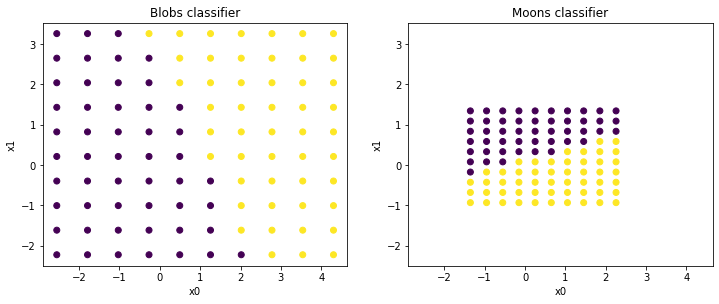

In [65]:
plot_comparison_synthetic_datasets(X_generated_gb, X_generated_gm)

### Random uniform
We generate 2 sets of uniform random data because the dynamic range of the features is different in each case.

We predict the labels of the generated data using the original classifiers.

In [66]:
# Blobs dataset
X_generated_ub = uniform_sampling(nsamples=100, feature_parameters=blobs_range)
X_generated_ub = labeling(X_generated_ub, classifier_blobs, label_col="y")

# Moons dataset
X_generated_um = uniform_sampling(nsamples=100, feature_parameters=moons_range)
X_generated_um = labeling(X_generated_um, classifier_moons, label_col="y")

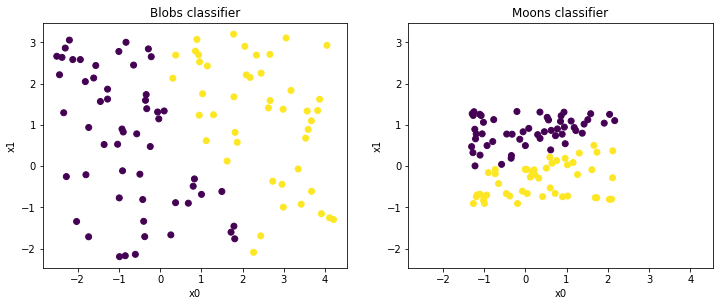

In [67]:
plot_comparison_synthetic_datasets(X_generated_ub, X_generated_um)

### Normal distribution

In [68]:
# Blobs dataset
X_generated_nb = normal_sampling(nsamples=100, label_col="y", feature_parameters=blobs_range, 
                                 feature_sigmas={"x0": 2, "x1": 2} )
X_generated_nb = labeling(X_generated_nb, classifier_blobs, label_col="y")

# Moons dataset
X_generated_nm = normal_sampling(nsamples=100, label_col="y", feature_parameters=moons_range, 
                                 feature_sigmas={"x0": 1, "x1": 1} )
X_generated_nm = labeling(X_generated_nm, classifier_moons, label_col="y")

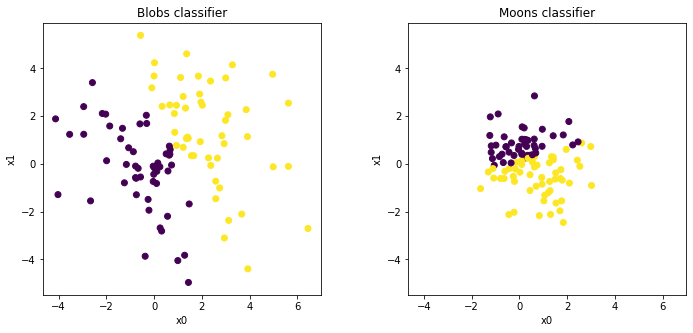

In [69]:
plot_comparison_synthetic_datasets(X_generated_nb, X_generated_nm)

----

## Copy classifier with synthetic data

### Blobs SVC classifier + grid-like synthetic data

In [70]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
blobs_copy_grid = ClassifierCopy(classifier_blobs, classifier_copy, grid_sampling, nsamples=200, 
                            feature_parameters=blobs_range)
blobs_copy_grid.copy_classifier()

#### Classification of synthetic training data

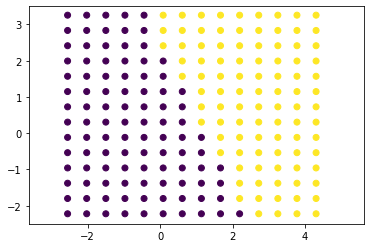

In [71]:
blobs_copy_grid_data = blobs_copy_grid.get_training_data()
plt.scatter(blobs_copy_grid_data.features["x0"], blobs_copy_grid_data.features["x1"], 
            c=blobs_copy_grid_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [72]:
synthetic_test_data = blobs_copy_grid.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 0.97

Classification report: 

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.94      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



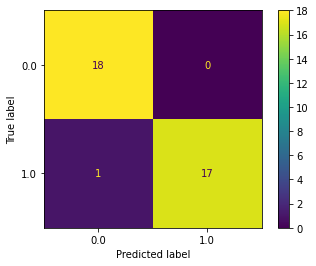

In [73]:
score_copy = blobs_copy_grid.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_grid.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = blobs_copy_grid.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



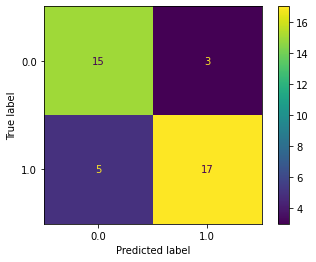

In [74]:
score_copy = blobs_copy_grid.copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_grid.copy, X_test_blobs, y_test_blobs)
y_predicted = blobs_copy_grid.copy.predict(X_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [75]:
# Synthetic data
error_synthetic = blobs_copy_grid.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = blobs_copy_grid.compute_fidelity_error(test_data=X_test_blobs)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0278
Original dataset:  0.0000


----
### Blobs SVC classifier + random uniform synthetic data

In [76]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
blobs_copy_uniform = ClassifierCopy(classifier_blobs, classifier_copy, uniform_sampling, nsamples=200, 
                            feature_parameters=blobs_range, random_state = 42)
blobs_copy_uniform.copy_classifier()

#### Classification of synthetic data

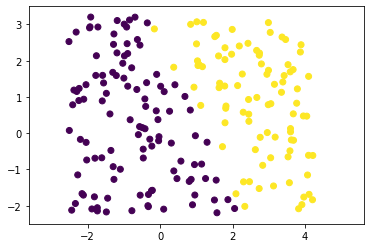

In [77]:
blobs_copy_uniform_data = blobs_copy_uniform.get_training_data()
plt.scatter(blobs_copy_uniform_data.features["x0"], blobs_copy_uniform_data.features["x1"], 
            c=blobs_copy_uniform_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [78]:
synthetic_test_data = blobs_copy_uniform.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



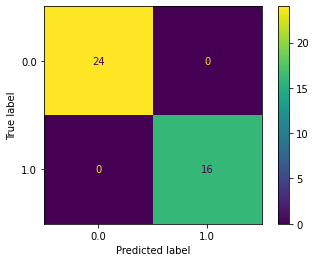

In [79]:
score_copy = blobs_copy_uniform.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_uniform.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = blobs_copy_uniform.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80        18
         1.0       0.89      0.73      0.80        22

    accuracy                           0.80        40
   macro avg       0.81      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



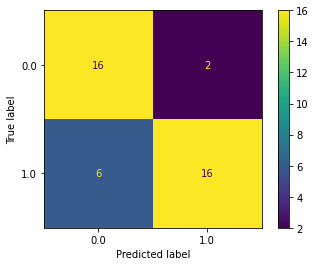

In [80]:
score_copy = blobs_copy_uniform.copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_uniform.copy, X_test_blobs, y_test_blobs)
y_predicted = blobs_copy_uniform.copy.predict(X_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [81]:
# Synthetic data
error_synthetic = blobs_copy_uniform.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = blobs_copy_uniform.compute_fidelity_error(test_data=X_test_blobs)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0500


-----
### Blobs SVC classifier + normally distributed synthetic data

In [82]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
blobs_copy_normal = ClassifierCopy(classifier_blobs, classifier_copy, normal_sampling, nsamples=200, 
                            feature_parameters=blobs_range, random_state = 42)
blobs_copy_normal.copy_classifier()

#### Classification of synthetic data

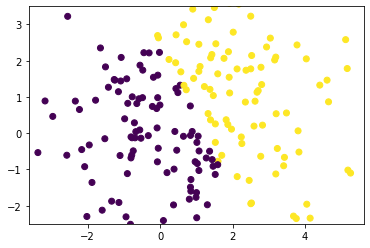

In [83]:
blobs_copy_normal_data = blobs_copy_normal.get_training_data()
plt.scatter(blobs_copy_normal_data.features["x0"], blobs_copy_normal_data.features["x1"], 
            c=blobs_copy_normal_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [84]:
synthetic_test_data = blobs_copy_normal.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 0.97

Classification report: 

               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        24
         1.0       1.00      0.94      0.97        16

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



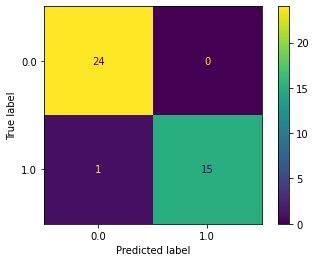

In [85]:
score_copy = blobs_copy_normal.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_normal.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = blobs_copy_normal.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

         0.0       0.40      0.56      0.47        18
         1.0       0.47      0.32      0.38        22

    accuracy                           0.42        40
   macro avg       0.43      0.44      0.42        40
weighted avg       0.44      0.42      0.42        40



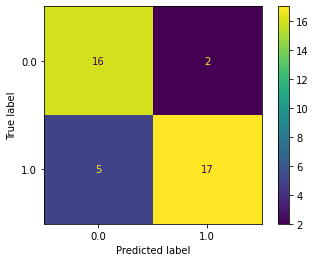

In [86]:
score_copy = blobs_copy_normal.copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(blobs_copy_normal.copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [87]:
# Synthetic data
error_synthetic = blobs_copy_normal.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = blobs_copy_normal.compute_fidelity_error(test_data=X_test_blobs)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0250
Original dataset:  0.0250


-----

### Moons SVC classifier + grid-like synthetic data

In [90]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
moons_copy_grid = ClassifierCopy(classifier_moons, classifier_copy, grid_sampling, nsamples=200, 
                            feature_parameters=moons_range)
moons_copy_grid.copy_classifier()

#### Classification of synthetic training data

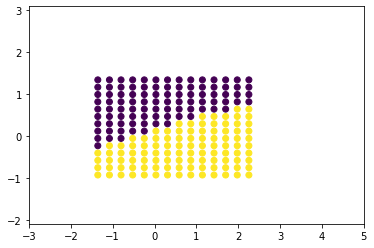

In [91]:
moons_copy_grid_data = moons_copy_grid.get_training_data()
plt.scatter(moons_copy_grid_data.features["x0"], moons_copy_grid_data.features["x1"], 
            c=moons_copy_grid_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [92]:
synthetic_test_data = moons_copy_grid.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



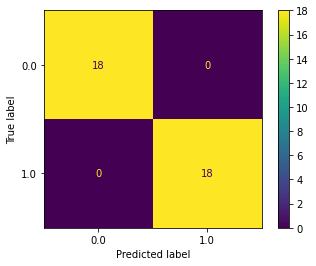

In [93]:
score_copy = moons_copy_grid.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_grid.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = moons_copy_grid.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



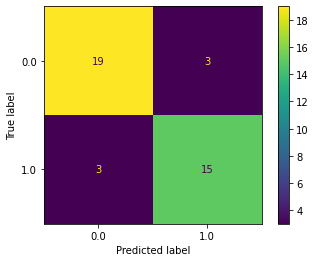

In [94]:
score_copy = moons_copy_grid.copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_grid.copy, X_test_moons, y_test_moons)
y_predicted = moons_copy_grid.copy.predict(X_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [95]:
# Synthetic data
error_synthetic = moons_copy_grid.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = moons_copy_grid.compute_fidelity_error(test_data=X_test_moons)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


----
### Blobs SVC classifier + random uniform synthetic data

In [96]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
moons_copy_uniform = ClassifierCopy(classifier_moons, classifier_copy, uniform_sampling, nsamples=200, 
                            feature_parameters=moons_range, random_state = 42)
moons_copy_uniform.copy_classifier()

#### Classification of synthetic data

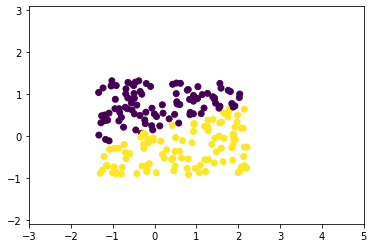

In [97]:
moons_copy_uniform_data = moons_copy_uniform.get_training_data()
plt.scatter(moons_copy_uniform_data.features["x0"], moons_copy_uniform_data.features["x1"], 
            c=moons_copy_uniform_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [98]:
synthetic_test_data = moons_copy_uniform.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



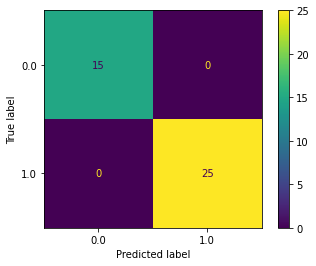

In [99]:
score_copy = moons_copy_uniform.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_uniform.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = moons_copy_uniform.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



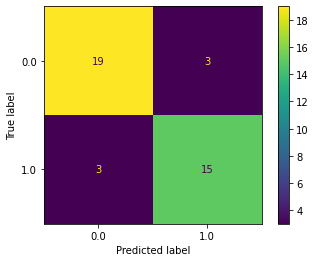

In [100]:
score_copy = moons_copy_uniform.copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_uniform.copy, X_test_moons, y_test_moons)
y_predicted = moons_copy_uniform.copy.predict(X_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [101]:
# Synthetic data
error_synthetic = moons_copy_uniform.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = moons_copy_uniform.compute_fidelity_error(test_data=X_test_moons)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


-----
### Blobs SVC classifier + normally distributed synthetic data

In [102]:
# Instantiate and copy a SVC classifier
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
moons_copy_normal = ClassifierCopy(classifier_moons, classifier_copy, normal_sampling, nsamples=200, 
                            feature_parameters=moons_range, random_state = 42)
moons_copy_normal.copy_classifier()

#### Classification of synthetic data

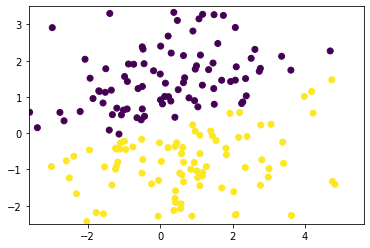

In [103]:
moons_copy_normal_data = moons_copy_normal.get_training_data()
plt.scatter(moons_copy_normal_data.features["x0"], moons_copy_normal_data.features["x1"], 
            c=moons_copy_normal_data.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data

In [104]:
synthetic_test_data = moons_copy_normal.generate_synthetic_data(generated_nsamples=40, random_state=42, 
                                                              label_col="class")


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



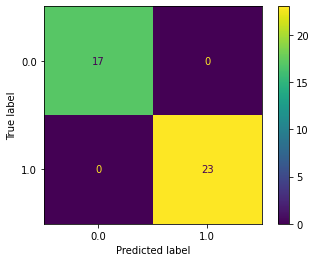

In [105]:
score_copy = moons_copy_normal.copy.score(synthetic_test_data.features, synthetic_test_data.labels)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_normal.copy, synthetic_test_data.features, synthetic_test_data.labels)
y_predicted = moons_copy_normal.copy.predict(synthetic_test_data.features)
print(f"\nClassification report: \n\n", classification_report(synthetic_test_data.labels, y_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.88

Classification report: 

               precision    recall  f1-score   support

         0.0       0.47      0.36      0.41        22
         1.0       0.39      0.50      0.44        18

    accuracy                           0.42        40
   macro avg       0.43      0.43      0.42        40
weighted avg       0.43      0.42      0.42        40



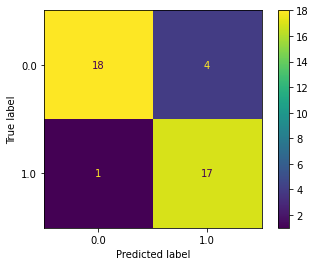

In [106]:
score_copy = moons_copy_normal.copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(moons_copy_normal.copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [107]:
# Synthetic data
error_synthetic = moons_copy_normal.compute_fidelity_error(test_data=synthetic_test_data.features)
# Original data
error_original = moons_copy_normal.compute_fidelity_error(test_data=X_test_moons)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0750


-----